# Stock Analysis & Prediction


## Introduction

##### Software Pre-requisites:
- `pip install finnhub-python`
- `pip install matplotlib`
- `pip install pandas`
- `pip install seaborn`
- `pip install numpy`
- `pip install scikit-learn`


#### How our analysis might fit into an application or investigation

Since we will be analysing Comcast stock to gather insight, we can leverage our findings into our own personal application or investiagation of the stock market by looking for key indicators for buying/selling other stocks, such as competitors, for personal usage. 

#### How our analysis is limited and could be improved

We can only rely on publically availible information which was gathered for free, as such the data set is limited in information compared to pay-to-access options. Since we opted for a free option we only have a years worth of Comcast stock information for our analysis. Additionally, there are several other factors our dataset does not capture in external market factors such as inflation, product launches, industry performance etc. 

#### Who might be interested in our analysis

Stock analysis helps traders to gain an insight into the economy, stock market, or securities. It involves studying the past and present market data and creating a methodology to choose appropriate stocks for trading. Stock analysis also includes the identification of ways of entry into and exit from the investments. Investors or traders make buying or selling decisions based on stock analysis information

#### Selection of data and tooling used for analysis

- FinnHub is the source of the dataset being used for analytics.
- The dataset contains real-time and historical data about the company fundamentals including financial reports, stock price and market sentiments.
- The dataset is an ideal starting point for the long-term stock price prediction or future growth prospects.
- For visualization we worked with Pandas, Matplotlib & Seaborn. 
- As part of this project we worked with Python ML related packages such as Scikit-learn and NumPy to generate forecasting.



#### Dataset
We utilized the dataset we created from our previous DSCI 511 pre-processing class to conduct our analysis.

Our data store is available to view in Google Drive: https://drive.google.com/drive/folders/1hgWRHwlC9thoPKd7-dRqEHTPGYv3LtUk

It contains data from Comcast, its competitors and other top companies within the stock market. We will focus primarily on Comcast (CMCSA stock ticker). We used Finnhub (https://finnhub.io/docs/api/introduction) as the source of our data. Below is a list of the data we generated for analysis:


- Candlestick Data: Daily candlestick data (OHLCV) for stocks.
> candlestick_data.csv

- Company Surprise Earnings: Historical quarterly earnings containing expected and actual earnings
> surprise_earnings.csv

- Recommendation Trends: The latest analyst recommendation trends for a company.
> recommendation_trends.csv

- Insider Sentiment: Insider sentiment for companies using the Monthly Share Purchase Ratio (MSPR). To give investors a glimpse at what the executives are thinking about the stock price and valuation in the near future.
> insider_sentiment.csv

- Insider Transactions: Insider transactions data sourced from Form 3,4,5, SEDI and relevant companies' filings.
> insider_transactions.csv

- Social Media Sentiment: Social sentiment for stocks on Reddit and Twitter.
> social_media_sentiment.csv

- Technical indicators: Stock technical indicator data with price data.
> technical_indicators.csv


#### Project Goal
- The goal of our project is to use the financial data and predict the stock price for CMCSA for the next few days using the python ML Library. We will be using Regression models for predicting the stock price: Linear Regression, Random Forest Regressor and Decision Tree Regression. The goal is to predict the stock price using the model that provides the best score as well as provide a comparative analysis of different models for the problem at hand. 


#### Individual contributions
- Geoff Patton is a software engineer. - Worked on different ML Algorithms using scikit learn for comparative analysis for the stock prices. Participated in team discussions regarding design and strategy.

- Ananda Mahalingam is a Software Engineer.- Worked on modeling the future stock price prediction for CMCSA. Experimented with different algorithms before settling on the appropriate one. Participated in team discussions regarding design and strategy.

- Fengtian Lu is a Software Engineer. - Analyze different ML Algorithms using scikit Learn for comparative study. Participated in team discussions regarding design and strategy.

- Rohit Bhattacharya is an IT analyst. - Worked on EDAs and modeling the future stock price prediction for CMCSA. Participated in team discussions regarding design and strategy.

All members worked on conducting EDA on our exisiting dataset to determine which features to use in our analysis. 

## Exploritory Data Analysis (EDA)

In [26]:
# Imports and constants used by notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sb

# Ticker Symbol of company to analyze
ticker_symbol = 'CMCSA'


#### Stock Price History Chart

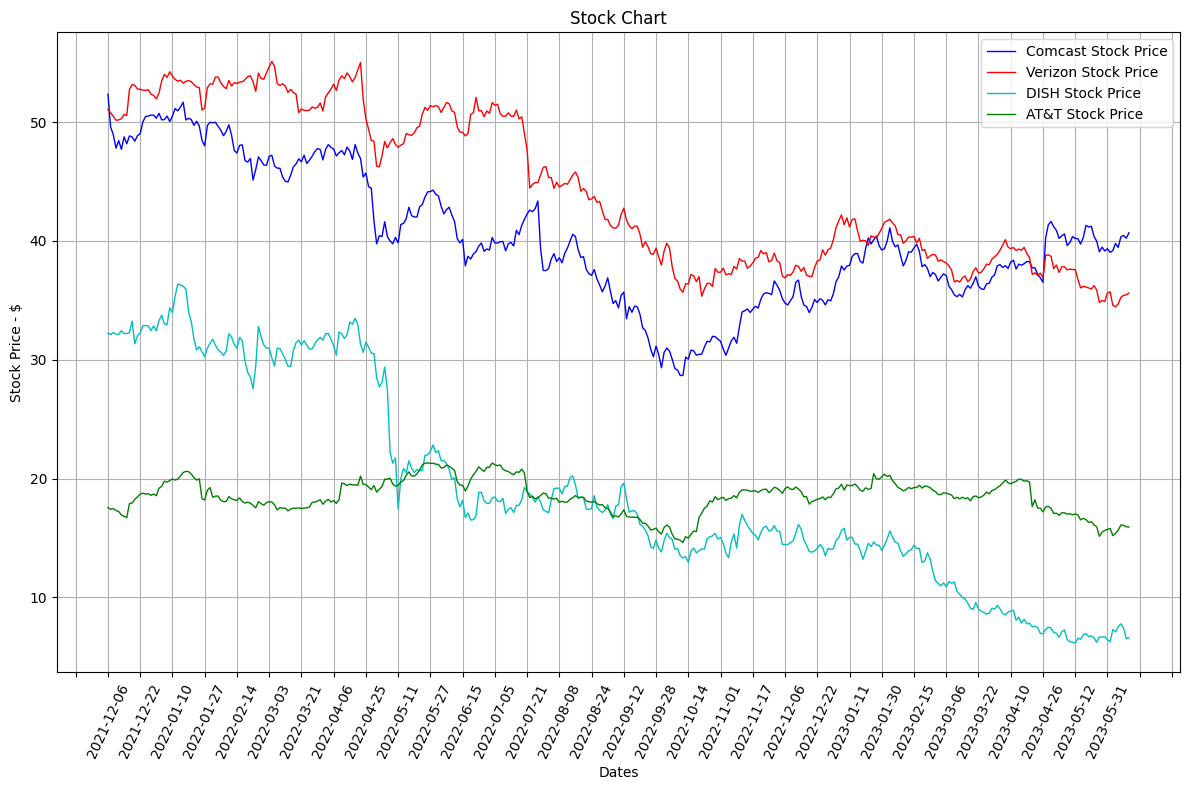

In [27]:

all_stock_df = pd.read_csv('./data/candlestick_data.csv', header = 0).sort_values(by=['unix_time'])


company_stock_data_df = all_stock_df[all_stock_df['symbol'] == ticker_symbol]
att_stock_data_df = all_stock_df[all_stock_df['symbol'] == 'T']
dish_stock_data_df = all_stock_df[all_stock_df['symbol'] == 'DISH']
vz_stock_data_df = all_stock_df[all_stock_df['symbol'] == 'VZ']

#netflix_stock_data_df = all_stock_df[all_stock_df['symbol'] == 'NFLX']
#apple_stock_data_df = all_stock_df[all_stock_df['symbol'] == 'AAPL']
#msft_stock_data_df = all_stock_df[all_stock_df['symbol'] == 'MSFT']


plt.figure(figsize=(12,8))
ax = plt.axes()
ax.grid()
ax.set(xlabel='Dates', ylabel='Stock Price - $', title='Stock Chart')

ax.plot(company_stock_data_df['date'], company_stock_data_df['close'], c='b', label='Comcast Stock Price', linewidth=1)
ax.plot(vz_stock_data_df['date'], vz_stock_data_df['close'], c='r', label='Verizon Stock Price', linewidth=1)
ax.plot(dish_stock_data_df['date'], dish_stock_data_df['close'], c='c', label='DISH Stock Price', linewidth=1)
ax.plot(att_stock_data_df['date'], att_stock_data_df['close'], c='g', label='AT&T Stock Price', linewidth=1)

#ax.plot(netflix_stock_data_df['date'], netflix_stock_data_df['close'], c='tab:grey', label='Netflix Stock Price', linewidth=1.25)
#ax.plot(apple_stock_data_df['date'], apple_stock_data_df['close'], c='y', label='Apple Stock Price', linewidth=1.25)
#ax.plot(msft_stock_data_df['date'], msft_stock_data_df['close'], c='m', label='MSFT Stock Price', linewidth=1.25)

ax.xaxis.set_major_locator(mticker. MultipleLocator(12))

for tick in ax.get_xticklabels():
    tick.set_rotation(65)

plt.tight_layout()
plt.legend()
plt.show()


#### Dataset Description

In [28]:
print("\nData Frame Shape: ", company_stock_data_df.shape)

print("\nDescribe Data Frame:")
display(company_stock_data_df.describe())

print("\nData Frame Null Check Count:")
display(pd.DataFrame(company_stock_data_df.isnull().sum()))



Data Frame Shape:  (381, 8)

Describe Data Frame:


,unix_time,open,close,high,low,volume
count,3.810000e+02,381.000000,381.000000,381.000000,381.000000,3.810000e+02
mean,1.662572e+09,40.247106,40.245486,40.730310,39.775533,2.314754e+07
std,1.383977e+07,5.651089,5.658497,5.721014,5.611446,8.175740e+06
min,1.638749e+09,28.672000,28.680000,29.150000,28.390000,9.285440e+06
25%,1.650586e+09,36.380000,36.290000,36.790000,36.030000,1.766830e+07
50%,1.662595e+09,39.330000,39.510000,39.890000,39.015000,2.117959e+07
75%,1.674605e+09,45.360000,45.020000,45.825000,44.800000,2.741461e+07
max,1.686528e+09,52.300000,52.350000,53.315000,52.060000,6.886219e+07



Data Frame Null Check Count:


,0
symbol,0
date,0
unix_time,0
open,0
close,0
high,0
low,0
volume,0


#### Histogram to show the distribution of values in each column from the candlestick dataset

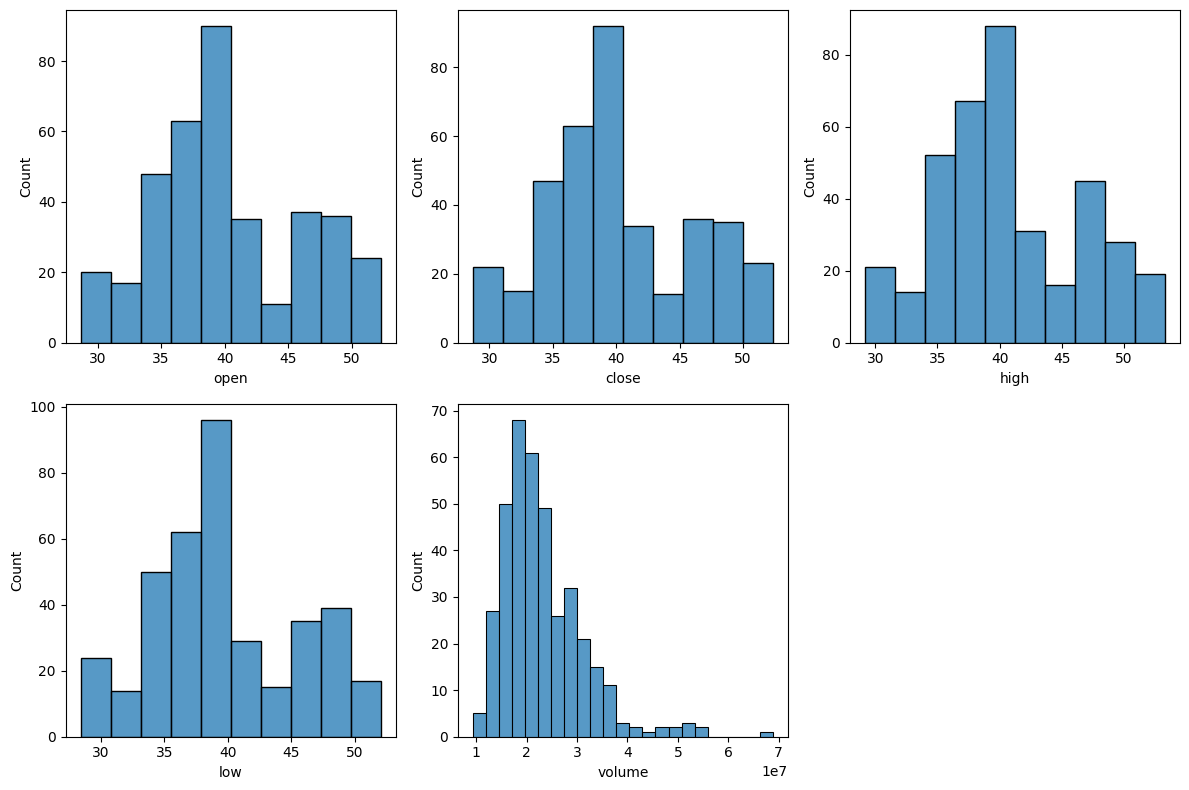

In [29]:
plt.figure(figsize=(12,8),dpi=100)

for i, col in enumerate(['open', 'close', 'high', 'low', 'volume']):
  plt.subplot(2,3,i+1)
  sb.histplot(company_stock_data_df[col])

plt.tight_layout()
plt.show()

#### Boxplot to show the distribution of data from the candlestick dataset

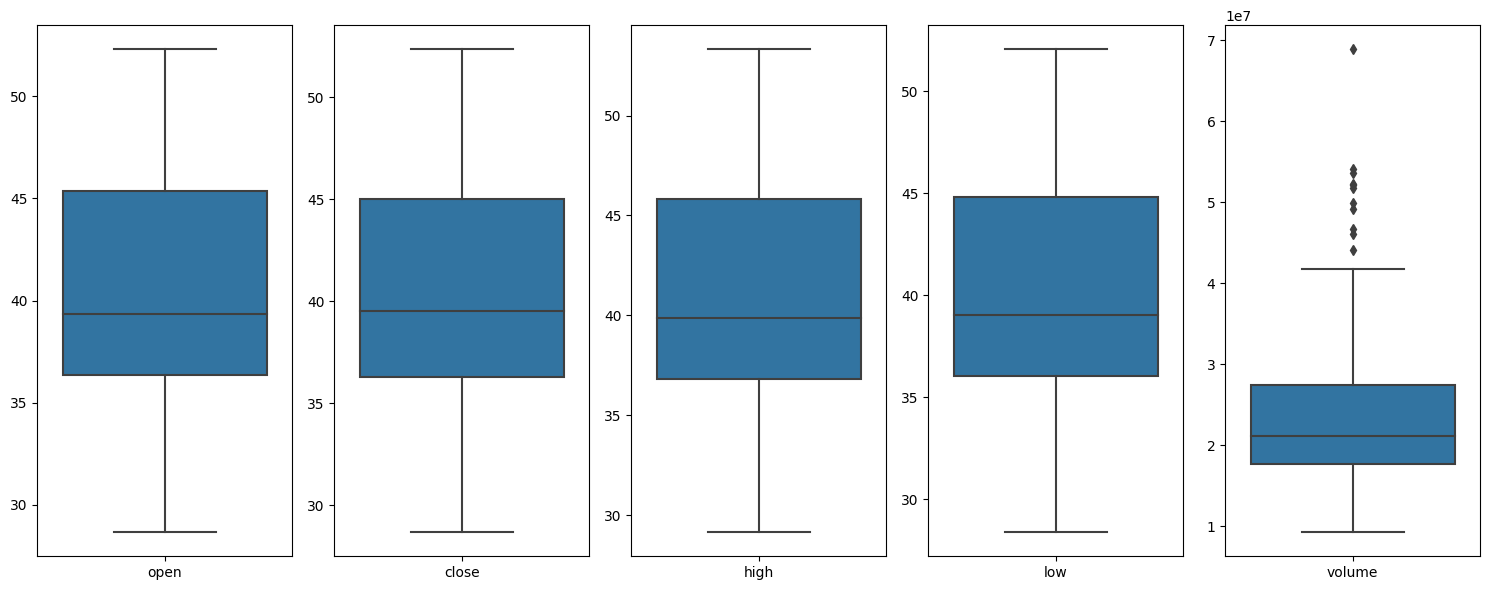

In [30]:
plt.figure(figsize=(15,6),dpi=100)
for i, col in enumerate(['open', 'close', 'high', 'low', 'volume']):
  plt.subplot(1,5,i+1)
  sb.boxplot(company_stock_data_df[[col]])

plt.tight_layout()
plt.show()

## Modeling

##### Support Methods to plot graphs and calculate metrics

In [31]:
# Support Methods to plot graphs and calculate metrics

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

def plot_graph(stock_df, test_x, test_y, prediction_y, model_name):
    plt.figure(figsize=(12,8),dpi=100)
    ax = plt.axes()
    ax.grid()
    ax.set(xlabel='Dates', ylabel='Stock Price - $', title=model_name)

    ax.plot(stock_df.index, stock_df['close'], label='actual', c='b', linewidth=1)
    ax.plot(test_x.index, test_y, label='test', c='r', linewidth=1)
    ax.plot(test_x.index, prediction_y, label='prediction', c='g', linewidth=1)

    ax.xaxis.set_major_locator(mticker. MultipleLocator(12))

    for tick in ax.get_xticklabels():
        tick.set_rotation(65)

    plt.tight_layout()
    plt.legend()
    plt.show()


def plot_dual_graph(model_name, stock_df_1, test_x_1, test_y_1, prediction_y_1,
                    stock_df_2, test_x_2, test_y_2, prediction_y_2):
    ax = plt.axes()
    ax.grid()
    ax.set(xlabel='Dates', ylabel='Stock Price - $', title=model_name)

    ax.plot(stock_df_1.index, stock_df_1['close'], label='comcast actual', c='b', linewidth=.8)
    #ax.plot(test_x_1.index, test_y_1, label='comcast test', c='skyblue', linewidth=.8)
    ax.plot(test_x_1.index, prediction_y_1, label='comcast pred', c='g', linewidth=.8)

    ax.plot(stock_df_2.index, stock_df_2['close'], label='verizon actual', c='r', linewidth=.8)
    #ax.plot(test_x_2.index, test_y_2, label='verizon test', c='orange', linewidth=.8)
    ax.plot(test_x_2.index, prediction_y_2, label='verizon pred', c='m', linewidth=.8)

    for tick in ax.get_xticklabels():
        tick.set_rotation(65)
        
    plt.legend(ncol=2)
    plt.tight_layout()
    plt.show()

regression_metrics = [r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error]
metric_names = ['R^2_Score', 'MSE', 'MAE', 'MAPE']

def calculate_metrics(text_y, y_pred, model_name):
    print(f"---- Model: {model_name} ----")

    for idx, metric in enumerate(regression_metrics):
        metric_result = metric(text_y, y_pred)
        print(f"{metric_names[idx]:30} {metric_result}")

    print("----------------------\n\n")

#### Predict Stock price with SkLearn Models

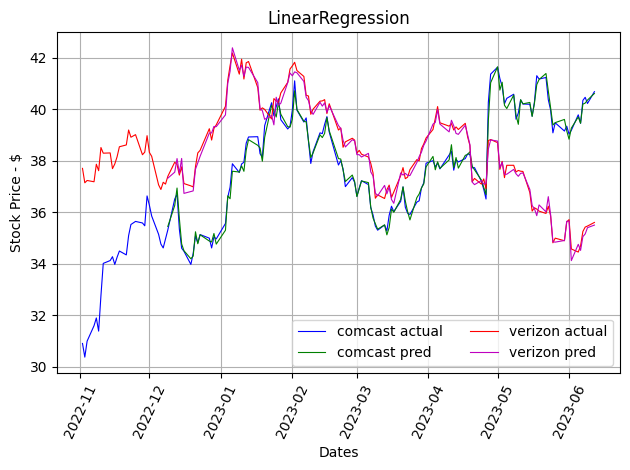

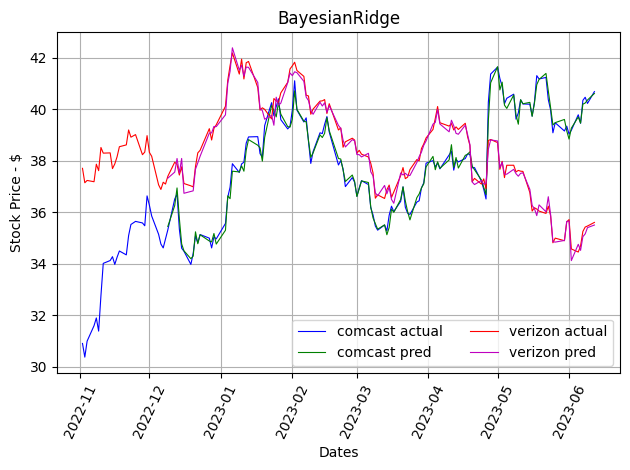

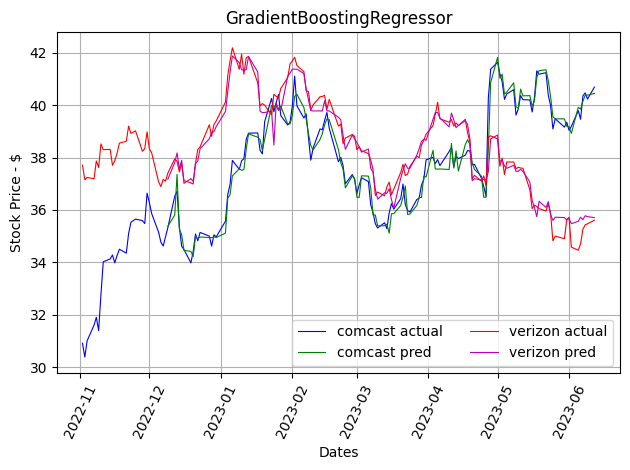

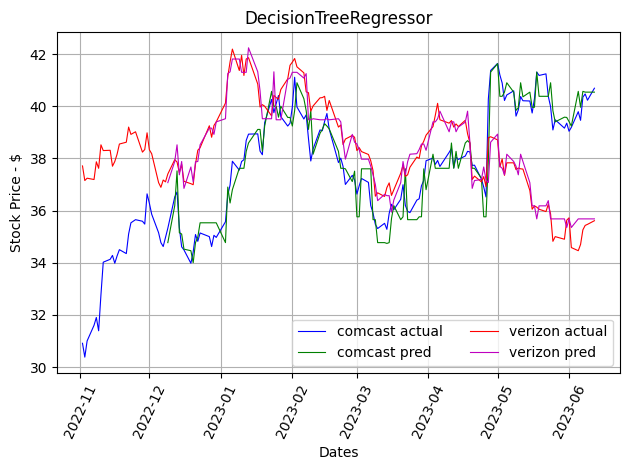

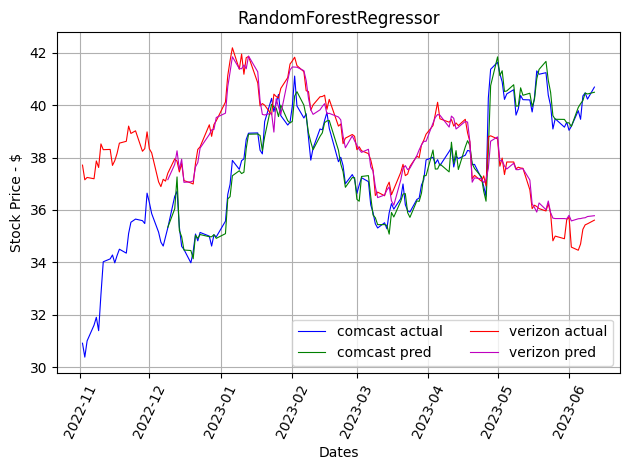

,Model,R^2_Score,MSE,MAE,MAPE
0,Comcast LinearRegression,0.988651,0.041349,0.153092,0.004003
1,Verizon LinearRegression,0.986541,0.047354,0.171856,0.004476
2,Comcast BayesianRidge,0.988597,0.041545,0.153570,0.004015
3,Verizon BayesianRidge,0.986475,0.047586,0.172048,0.004481
4,Comcast GradientBoostingRegressor,0.963055,0.134602,0.275871,0.007226
5,Verizon GradientBoostingRegressor,0.956524,0.152963,0.276875,0.007245
6,Comcast DecisionTreeRegressor,0.896564,0.376850,0.467540,0.012369
7,Verizon DecisionTreeRegressor,0.936608,0.223033,0.366032,0.009521
8,Comcast RandomForestRegressor,0.961424,0.140544,0.279208,0.007284
9,Verizon RandomForestRegressor,0.961049,0.137043,0.265840,0.006963


In [32]:
from collections import defaultdict
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

all_models = [LinearRegression(), BayesianRidge(), GradientBoostingRegressor(), DecisionTreeRegressor(), RandomForestRegressor()]
metric_results_dict = defaultdict(list)

all_stock_df = pd.read_csv('./data/candlestick_data.csv', header = 0).sort_values(by=['unix_time'])

all_stock_df['date'] = pd.to_datetime(all_stock_df['date'])
all_stock_df.index = all_stock_df['date']


comcast_stock_df = all_stock_df[all_stock_df['symbol'] == 'CMCSA'].copy()
verizon_stock_df = all_stock_df[all_stock_df['symbol'] == 'VZ'].copy()

comcast_stock_df = comcast_stock_df.drop(['date','symbol','unix_time'], axis=1)
verizon_stock_df = verizon_stock_df.drop(['date','symbol','unix_time'], axis=1)

c_data_x = comcast_stock_df.loc[:,comcast_stock_df.columns != 'close' ]
v_data_x = verizon_stock_df.loc[:,verizon_stock_df.columns != 'close' ]

# standardize the data
c_std_data_x = (c_data_x - c_data_x.mean()) / c_data_x.std(ddof=1)
v_std_data_x = (v_data_x - v_data_x.mean()) / v_data_x.std(ddof=1)

c_data_y = comcast_stock_df['close']
v_data_y = verizon_stock_df['close']

c_x_train, c_x_test, c_y_train, c_y_test = train_test_split(c_std_data_x, c_data_y, test_size=0.33, shuffle=False, random_state=1)
v_x_train, v_x_test, v_y_train, v_y_test = train_test_split(v_std_data_x, v_data_y, test_size=0.33, shuffle=False, random_state=1)


display_data_size = int(np.ceil(3/5 * len(comcast_stock_df)))
c_disply_data = comcast_stock_df[display_data_size:]
v_disply_data = verizon_stock_df[display_data_size:]

for model in all_models:
    model_title = str(model)[:-2]

    c_trained_model = model.fit(c_x_train, c_y_train)
    c_y_prediction = c_trained_model.predict(c_x_test)

    v_trained_model = model.fit(v_x_train, v_y_train)
    v_y_prediction = v_trained_model.predict(v_x_test)

    plot_dual_graph(model_title, c_disply_data, c_x_test, c_y_test, c_y_prediction,
                    v_disply_data, v_x_test, v_y_test, v_y_prediction)
    
    metric_results_dict["Model"].append('Comcast ' + model_title)
    for idx, metric in enumerate(regression_metrics):
        metric_result = metric(c_y_test, c_y_prediction)
        metric_results_dict[metric_names[idx]].append(metric_result)

    
    metric_results_dict["Model"].append('Verizon ' + model_title)
    for idx, metric in enumerate(regression_metrics):
        metric_result = metric(v_y_test, v_y_prediction)
        metric_results_dict[metric_names[idx]].append(metric_result)


metrics_df = pd.DataFrame(metric_results_dict)

display(metrics_df)

## Future Works

### Integrate Technical Indicators with Stock prediction

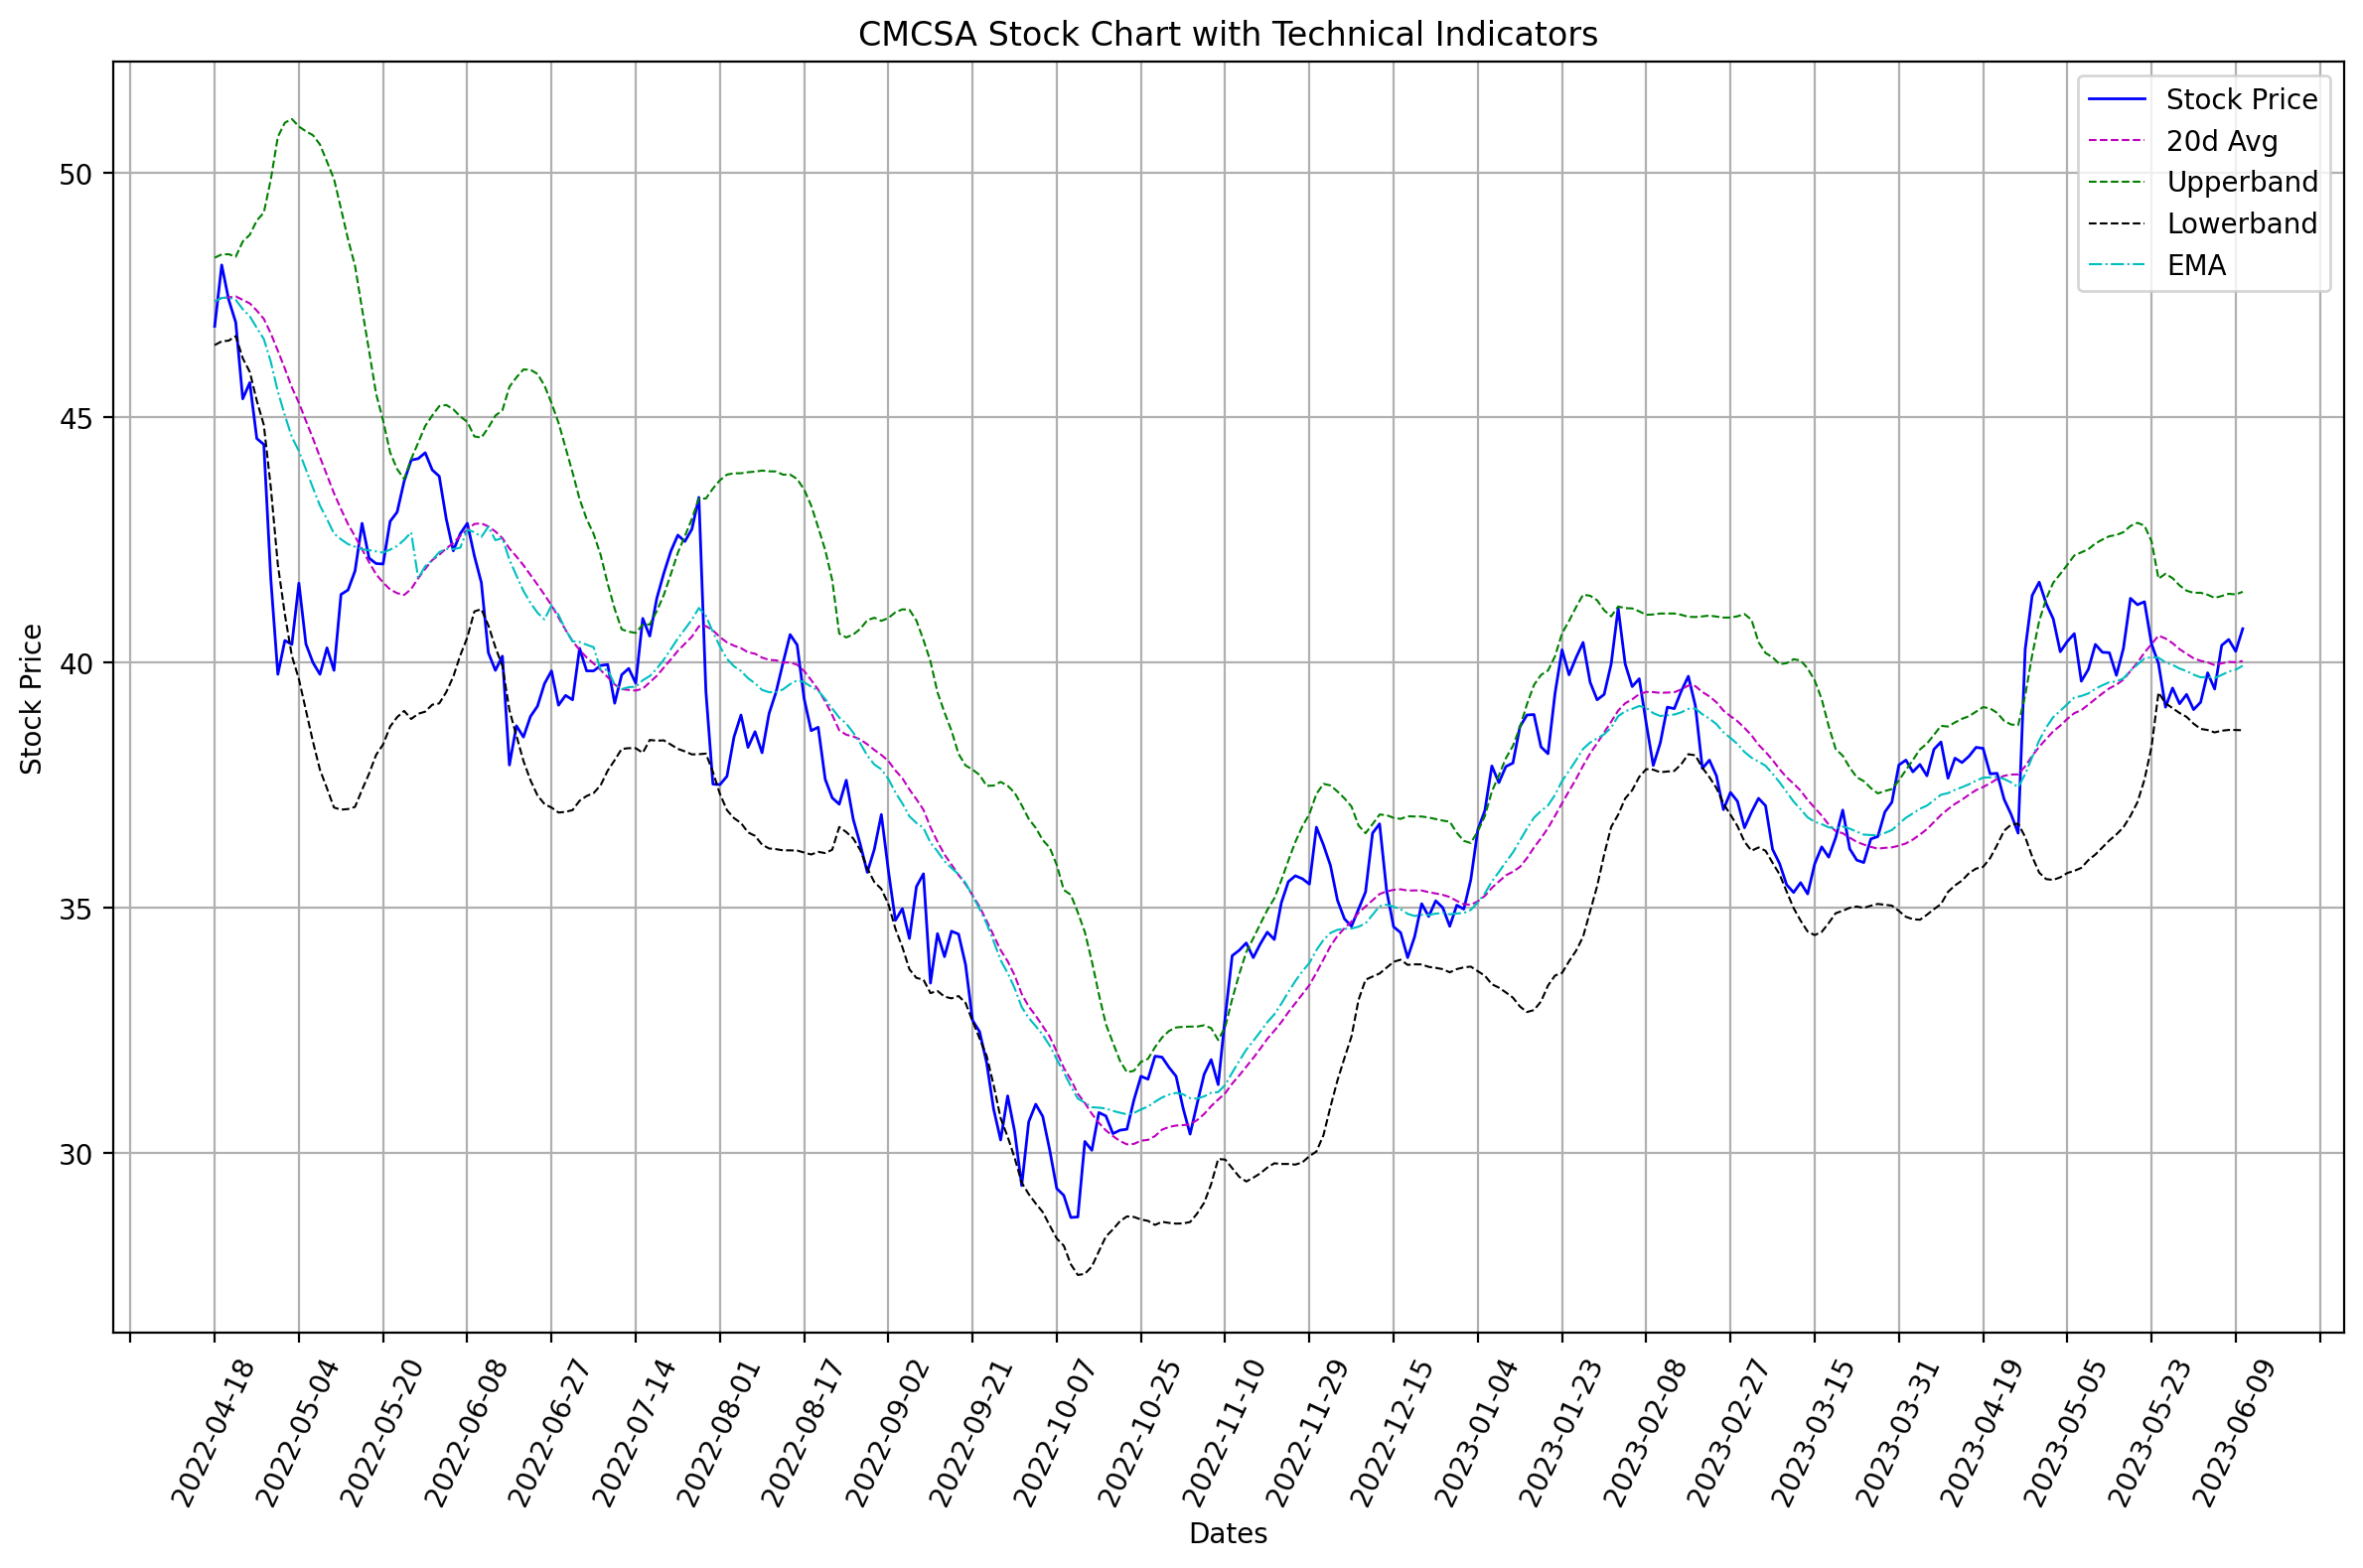

In [33]:
all_stock_df = pd.read_csv('./data/technical_indicators.csv', header = 0)

stock_technical_df = all_stock_df[all_stock_df['symbol'] == ticker_symbol].drop('symbol', axis = 1).sort_values(by=['unix_time'])

plt.figure(figsize=(12,8), dpi=200)
ax = plt.axes()
ax.grid()
ax.set(xlabel='Dates', ylabel='Stock Price', title=ticker_symbol + ' Stock Chart with Technical Indicators')

ax.plot(stock_technical_df['date'], stock_technical_df['close'], label='Stock Price', c='b', linewidth=1)
ax.plot(stock_technical_df['date'], stock_technical_df['middleband'], label='20d Avg', c='m', linewidth=.75, linestyle = 'dashed')
ax.plot(stock_technical_df['date'], stock_technical_df['upperband'], label='Upperband', c='g', linewidth=.75, linestyle = 'dashed')
ax.plot(stock_technical_df['date'], stock_technical_df['lowerband'], label='Lowerband', c='k', linewidth=.75, linestyle = 'dashed')
ax.plot(stock_technical_df['date'], stock_technical_df['ema'], label='EMA', c='c', linewidth=.75, linestyle = 'dashdot')

ax.xaxis.set_major_locator(mticker. MultipleLocator(12))

for tick in ax.get_xticklabels():
    tick.set_rotation(65)

plt.tight_layout()
plt.legend()
plt.show()

#### Displays the latest analyst recommendation trends for a company.

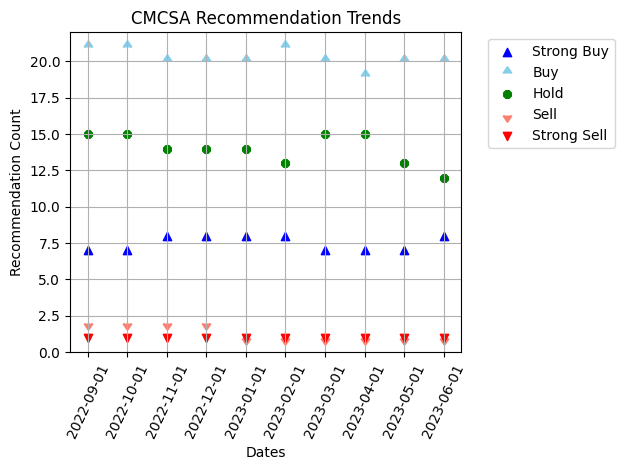

In [34]:
all_trends_df = pd.read_csv('./data/recommendation_trends.csv', header = 0)
stock_trends_df = all_trends_df[all_trends_df['symbol'] == ticker_symbol].sort_values(by=['period'])

ax = plt.axes()
ax.grid()
ax.set(xlabel='Dates', ylabel='Recommendation Count', title=ticker_symbol + " Recommendation Trends")

ax.scatter(stock_trends_df['period'], stock_trends_df['strongBuy'], label='Strong Buy', c='b', marker="^")
ax.scatter(stock_trends_df['period'], stock_trends_df['buy'], label='Buy', c='skyblue', marker=10)
ax.scatter(stock_trends_df['period'], stock_trends_df['hold'], label='Hold', c='g', marker="8")
ax.scatter(stock_trends_df['period'], stock_trends_df['sell'], label='Sell', c='salmon', marker=11)
ax.scatter(stock_trends_df['period'], stock_trends_df['strongSell'], label='Strong Sell', c='r', marker="v")

for tick in ax.get_xticklabels():
        tick.set_rotation(65)

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.show()

#### Displays the historical quarterly earnings surprise for a company.

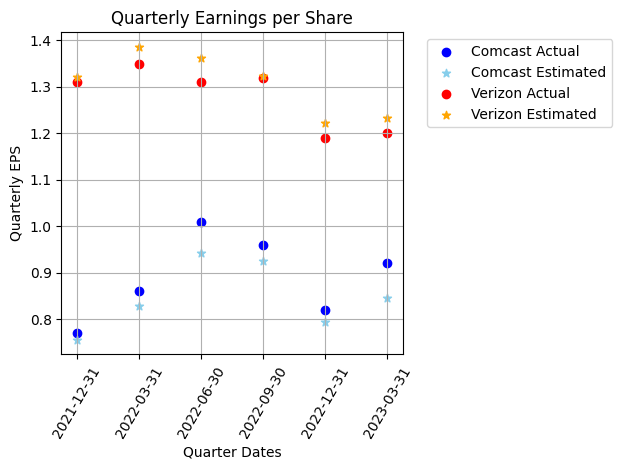

In [35]:
all_earnings_df = pd.read_csv('./data/surprise_earnings.csv', header = 0)
comcast_earnings_df = all_earnings_df[all_earnings_df['symbol'] == ticker_symbol].sort_values(by=['period'])
verizon_earnings_df = all_earnings_df[all_earnings_df['symbol'] == 'VZ'].sort_values(by=['period'])

ax = plt.axes()
ax.grid()
ax.set(xlabel='Quarter Dates', ylabel='Quarterly EPS', title="Quarterly Earnings per Share")

ax.scatter(comcast_earnings_df['period'], comcast_earnings_df['actual'], label='Comcast Actual', c='b')
ax.scatter(comcast_earnings_df['period'], comcast_earnings_df['estimate'], label='Comcast Estimated', c='skyblue', marker="*")

ax.scatter(verizon_earnings_df['period'], verizon_earnings_df['actual'], label='Verizon Actual', c='r')
ax.scatter(verizon_earnings_df['period'], verizon_earnings_df['estimate'], label='Verizon Estimated', c='orange', marker="*")


for tick in ax.get_xticklabels():
    tick.set_rotation(60)

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.show()

#### Displays the Positive and Negative Mention count from twitter for a company.

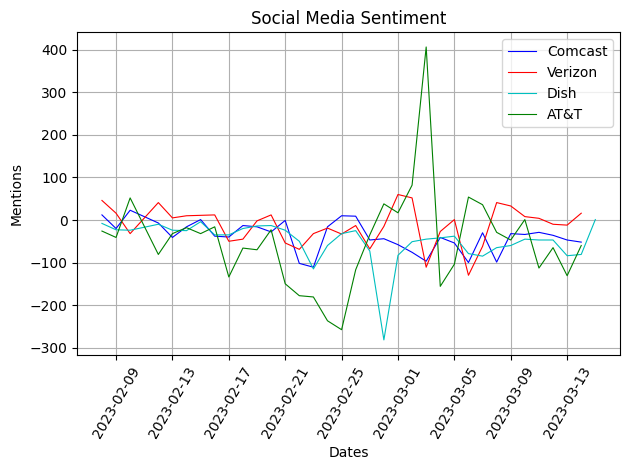

In [36]:
from datetime import date

all_social_df = pd.read_csv('./data/social_media_sentiment.csv', header = 0)
all_social_df['date'] = pd.to_datetime(all_social_df['atTime']).dt.date

start_date = date(2023, 2, 8)
end_date = date(2023, 3, 15)
mask = (all_social_df['date'] >= start_date) & (all_social_df['date'] <= end_date)
all_social_df = all_social_df.loc[mask]

comcast_social_df = all_social_df[all_social_df['symbol'] == ticker_symbol].copy()
verizon_social_df = all_social_df[all_social_df['symbol'] == 'VZ'].copy()
dish_social_df = all_social_df[all_social_df['symbol'] == 'DISH'].copy()
att_social_df = all_social_df[all_social_df['symbol'] == 'T'].copy()

c_social_sum = comcast_social_df.groupby('date', as_index=False)[['positiveMention_twitter','positiveMention_reddit','negativeMention_twitter','negativeMention_reddit']].sum()
c_social_sum['score'] = c_social_sum['positiveMention_twitter'] + c_social_sum['positiveMention_reddit'] - (c_social_sum['negativeMention_twitter'] + c_social_sum['negativeMention_reddit'])

v_social_sum = verizon_social_df.groupby('date', as_index=False)[['positiveMention_twitter','positiveMention_reddit','negativeMention_twitter','negativeMention_reddit']].sum()
v_social_sum['score'] = v_social_sum['positiveMention_twitter'] + v_social_sum['positiveMention_reddit'] - (v_social_sum['negativeMention_twitter'] + v_social_sum['negativeMention_reddit'])

dish_social_sum = dish_social_df.groupby('date', as_index=False)[['positiveMention_twitter','positiveMention_reddit','negativeMention_twitter','negativeMention_reddit']].sum()
dish_social_sum['score'] = dish_social_sum['positiveMention_twitter'] + dish_social_sum['positiveMention_reddit'] - (dish_social_sum['negativeMention_twitter'] + dish_social_sum['negativeMention_reddit'])

att_social_sum = att_social_df.groupby('date', as_index=False)[['positiveMention_twitter','positiveMention_reddit','negativeMention_twitter','negativeMention_reddit']].sum()
att_social_sum['score'] = att_social_sum['positiveMention_twitter'] + att_social_sum['positiveMention_reddit'] - (att_social_sum['negativeMention_twitter'] + att_social_sum['negativeMention_reddit'])

ax = plt.axes()
ax.grid()
ax.set(xlabel='Dates', ylabel='Mentions', title="Social Media Sentiment")

ax.plot(c_social_sum['date'], c_social_sum['score'], label='Comcast', c='b', linewidth=.8)
ax.plot(v_social_sum['date'], v_social_sum['score'], label='Verizon', c='r', linewidth=.8)
ax.plot(dish_social_sum['date'], dish_social_sum['score'], label='Dish', c='c', linewidth=.8)
ax.plot(att_social_sum['date'], att_social_sum['score'], label='AT&T', c='g', linewidth=.8)

for tick in ax.get_xticklabels():
    tick.set_rotation(60)

plt.legend()
plt.tight_layout()
plt.show()

## Prediction
This prediction code is designed to read the candlestick stock information for CMCSA or another company from a .csv file and will predict the 'close' stock price for the past/future. It will also provide a comparative analysis of the actual stock price versus the price predicted by the model. This implementation will also plot the graphs between actual/predicted/future 'close' price for comparison.

#### Random Forest Regressor Prediction

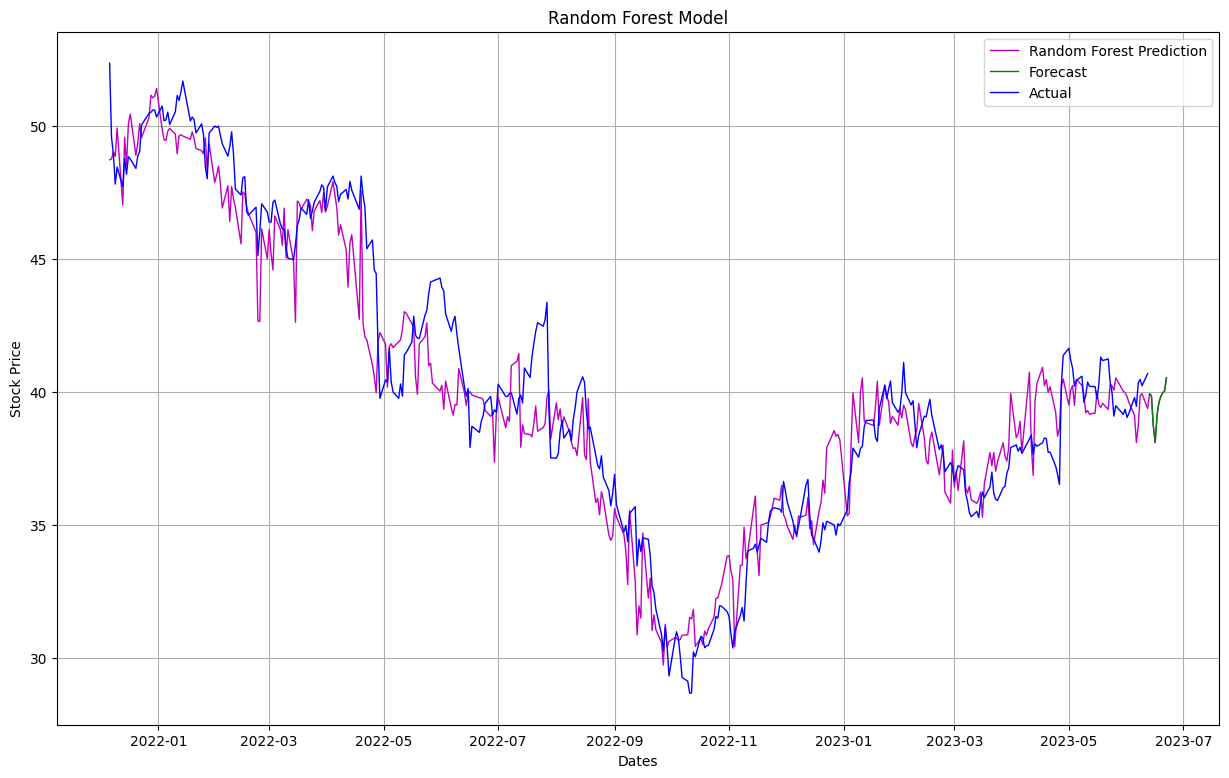

Random Forest Model score: 0.8414921266641939

Actual close Price:


,close
date,
2023-05-30,39.16
2023-05-31,39.35
2023-06-01,39.04
2023-06-02,39.19
2023-06-05,39.79
2023-06-06,39.46
2023-06-07,40.35
2023-06-08,40.47
2023-06-09,40.23



Predicted close Price:


,0
date,
2023-05-30,40.0293
2023-05-31,39.9692
2023-06-01,39.8281
2023-06-02,39.6081
2023-06-05,39.1230
2023-06-06,38.0978
2023-06-07,38.7280
2023-06-08,39.8643
2023-06-09,39.9322



Future close Price:


,0
date,
2023-06-13,39.9322
2023-06-14,39.8643
2023-06-15,38.7280
2023-06-16,38.0978
2023-06-17,39.1230
2023-06-18,39.6081
2023-06-19,39.8281
2023-06-20,39.9692
2023-06-21,40.0293


In [37]:
from sklearn.ensemble import RandomForestRegressor
from datetime import timedelta

predict_days = 10

comcast_forest_regressor_df = company_stock_data_df.copy()
comcast_forest_regressor_df['prediction'] = comcast_forest_regressor_df['close'].shift(-predict_days)

comcast_forest_regressor_df['date'] = pd.to_datetime(comcast_forest_regressor_df['date'])
comcast_forest_regressor_df.index = comcast_forest_regressor_df['date']
comcast_forest_regressor_df = pd.DataFrame(comcast_forest_regressor_df.iloc[:,-5:]).sort_values(by='date')

next_date = comcast_forest_regressor_df.index.max()
prev_date = comcast_forest_regressor_df.index.max()
current_date = next_date

for i in range(predict_days):   
    next_date += timedelta(days=1)
    prev_date -= timedelta(days=1)
    while (prev_date not in comcast_forest_regressor_df.index.values):
        prev_date -= timedelta(days=1)
    comcast_forest_regressor_df.loc[next_date] = comcast_forest_regressor_df.loc[prev_date]
    comcast_forest_regressor_df.loc[next_date]['open'] = comcast_forest_regressor_df.loc[current_date]['close']
    comcast_forest_regressor_df.loc[next_date]['prediction'] = np.nan
    current_date = next_date


X = np.array(comcast_forest_regressor_df.drop('prediction', axis = 1))
X = X[:-predict_days*2] 

y = np.array(comcast_forest_regressor_df['prediction'])
y = y[:-predict_days*2] 


X_train, X_test, y_train_labels, y_test_labels = train_test_split(X,  y, train_size=0.75, test_size=0.25, random_state=0)

forest_model = RandomForestRegressor()
forest_model.fit(X_train, y_train_labels)

X_predict = np.array(comcast_forest_regressor_df.drop('prediction', axis=1))[-predict_days:]

model_predict_prediction = forest_model.predict(X_predict)
model_real_prediction = forest_model.predict(np.array(comcast_forest_regressor_df.drop('prediction', axis=1)))

plt.figure(figsize=(15, 9))
plt.title("Random Forest Model")
plt.ylabel("Stock Price")
plt.xlabel("Dates")

plt.plot(comcast_forest_regressor_df.index[0:], model_real_prediction[0:], label='Random Forest Prediction', color='m', linewidth=1)
plt.plot(comcast_forest_regressor_df.index[-predict_days:], model_predict_prediction, label='Forecast', color='green', linewidth=1)
plt.plot(comcast_forest_regressor_df.index[0:-predict_days], comcast_forest_regressor_df['close'][0:-predict_days], label='Actual', color='b', linewidth=1)
plt.legend()
plt.grid()
plt.show()

# Print Results
print('Random Forest Model score:', forest_model.score(X_test, y_test_labels))
print('\nActual close Price:')
display(pd.DataFrame(comcast_forest_regressor_df['close'][0:-predict_days].tail(10)))
print('\nPredicted close Price:')
display(pd.DataFrame(model_real_prediction[0:-predict_days][-10:], comcast_forest_regressor_df.index[0:-predict_days][-10:]))
print('\nFuture close Price:')
display(pd.DataFrame(model_predict_prediction, comcast_forest_regressor_df.index[-predict_days:]))